<img src="images/churn_image.jpeg" alt="Churn Image">

# Telecom Churn Analysis: What Keeps Your Customers "On the Line"
---
Authors: Jared Mitchell, Andrew Marinelli, Wes Newcomb

## Overview
---
In this notebook, we analyze and build classification models with the data from an anonymous American telecom company in an effort to understand the relationships and patterns between several customer variables and customer churn. After cleaning and encoding the data, we take an iterative and comparative approach to model production, eventually resulting in a robust classification model that can determine with sufficient accuracy the likelihood that a given customer will churn. 

## Business Understanding
---
Churn has long been king for companies wishing to determine the success of their product: Intuitively, customers wouldn't drop your service if they liked it, right? "Your churn rate is a direct reflection of the value of the product and features that you're offering to customers." Further, when combined with other features of your service, such as cost, we can determine the price at which the offered service becomes most profitable: we're willing to lose some customers to an increased cost of service as long as the double bottom line profit grows as a result. Thus, the question is born: Is there a way that we can predict churn on a client-by-client basis, so that we can shift from a <b>reactive</b> to a <b>proactive</b> approach to business decisions with respect to items such as product feature implementations, customer service operations, retention campaigns, and pricing optimization? The short answer is yes. 

## Data Exploration
---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Be sure to import express
%matplotlib inline

In [2]:
df = pd.read_csv('data/telecom_customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

## Data Preparation
---

In [6]:
# drop columns of little importance to determining churn, as determined by ...
# the fact that they are arbitrarily assigned by the telecom company
df = df.drop(['area code', 'phone number'], axis=1)

In [7]:
df['churn'] = df['churn'].astype(int)
df['international plan'] = df['international plan'].map(lambda x: 1 if x=='yes' else 0)
df['voice mail plan'] = df['voice mail plan'].map(lambda x: 1 if x=='yes' else 0)

In [8]:
states_df = pd.DataFrame(df.state.value_counts()).reset_index()
states_df = states_df.rename(columns={'index':'state', 'state':'value_count'})
states_df = states_df.sort_values('state')
states_df = states_df.merge(df.groupby(['state'])['churn'].mean(), on='state')

In [80]:
fig = px.choropleth(states_df,  # Input Pandas DataFrame
                    locations='state',  # DataFrame column with locations
                    color="value_count",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    labels={'value_count':'Number of Clients'},
                    color_continuous_scale=px.colors.sequential.Blues) 
fig.update_layout(
    title_text = 'State Rankings By Customer Count', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [78]:
fig = px.choropleth(states_df,  # Input Pandas DataFrame
                    locations='state',  # DataFrame column with locations
                    color="churn",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    labels={'churn':'Churn Rate'},
                    color_continuous_scale=px.colors.sequential.Oranges) 
fig.update_layout(
    title_text = 'State Rankings by Churn Rate', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

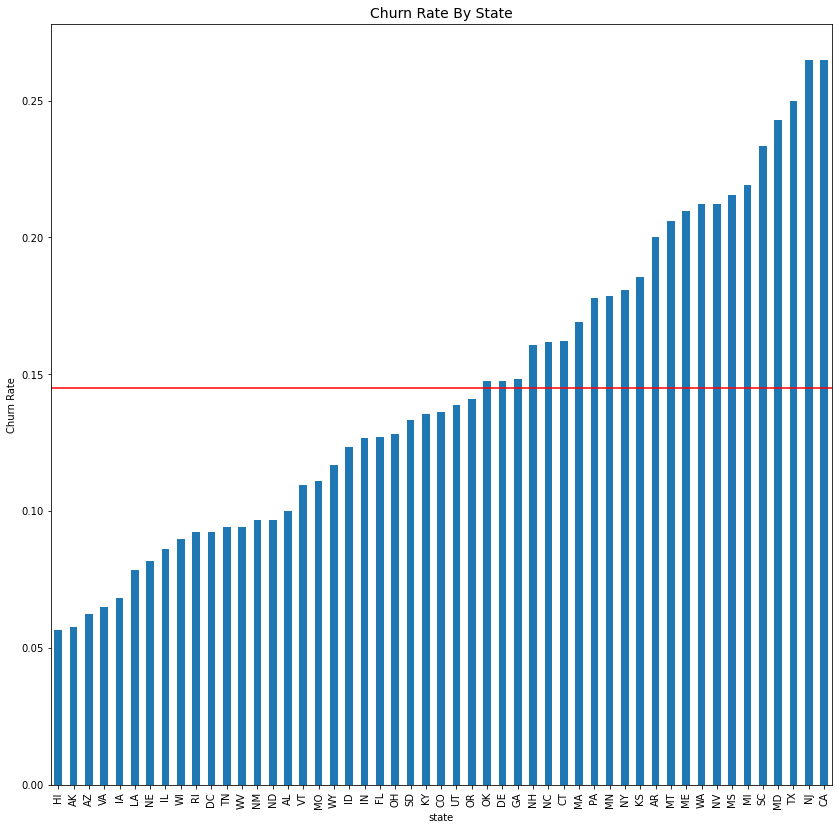

In [11]:
gb = df.groupby(['state'])['churn'].mean()
gb.sort_values().plot(kind='bar', figsize=(14,14));
plt.axhline(y=gb.mean(), color='r', linestyle='-');
plt.title('Churn Rate By State', fontsize=14);
plt.ylabel('Churn Rate');
plt.show()

In [12]:
states_df.corr()

,value_count,churn
value_count,1.000000,-0.001216
churn,-0.001216,1.000000


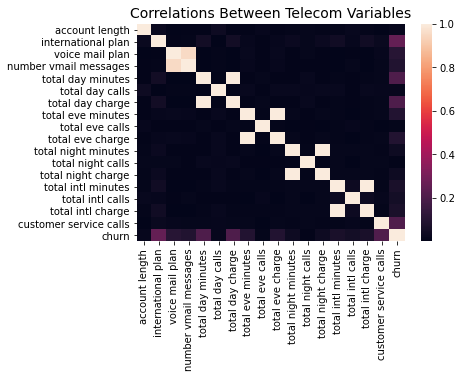

In [13]:
sns.heatmap(df.corr().abs());
plt.title('Correlations Between Telecom Variables', fontsize=14)
plt.show()

In [14]:
df = df.drop(['number vmail messages','total day charge','total eve charge', 
             'total night charge', 'total intl charge'], axis=1)

In [15]:
state_dummies = pd.get_dummies(df['state'], drop_first=True)
df = df.drop('state', axis=1)
df = pd.concat([df, state_dummies], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_cols = df.drop(['churn'], axis=1).columns
y_cols = ['churn']

X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

X_train_df = pd.DataFrame(X_train_scaled, columns=X_cols)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_cols)

y_train_df = pd.DataFrame(y_train, columns=y_cols)
y_test_df = pd.DataFrame(y_test, columns=y_cols)

## Modeling
---

### Baseline Model

In [38]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train_df, y_train_df)
cv_mean = cross_val_score(dummy, X_train_df, y_train_df)
cv_mean

array([0.856     , 0.856     , 0.854     , 0.854     , 0.85571142])

In [39]:
round(dummy.score(X_test_df, y_test_df), 3)

0.855

### Logistic Regression

>1 0.856 (0.003)
>2 0.853 (0.004)
>3 0.851 (0.008)
>4 0.854 (0.010)
>5 0.855 (0.011)
>6 0.858 (0.011)
>7 0.860 (0.013)
>8 0.860 (0.013)
>9 0.859 (0.013)


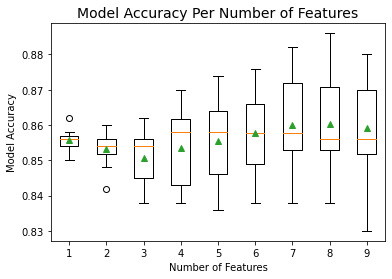

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# get a list of models to evaluate
def get_models(model):
    models = dict()
    for i in range(1, 10):
        rfe = RFE(estimator=model, n_features_to_select=i)
        model = model
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models(LogisticRegression(random_state=42))
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_df, y_train_df)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('Number of Features')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracy Per Number of Features', fontsize=14)
plt.show()

In [51]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7)
rfe.fit(X_train_df, y_train)
support = rfe.support_
X_cols[support]

Index(['international plan', 'voice mail plan', 'total day minutes',
       'total eve minutes', 'total intl minutes', 'total intl calls',
       'customer service calls'],
      dtype='object')

### k-Nearest Neighbors

In [76]:
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier

norm = Normalizer()
knn = KNeighborsClassifier()
knn_X_tr = norm.fit_transform(X_train_df)
knn_X_test = norm.fit_transform(X_test_df)
knn.fit(knn_X_tr, np.ravel(y_train_df))
knn.score(knn_X_test, np.ravel(y_test_df))

0.854916067146283

### Naive Bayesian

### Simple Decision Tree

## Evaluation
---

## Conclusion
---

## Future Research
---